In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE

#LOAD DATA 1

In [2]:
train_featurs = pd.read_csv('/content/train_features (2).csv')
train_labels = pd.read_csv('/content/train_labels (2).csv')
train = pd.concat([train_featurs, train_labels], axis=1)

#LOAD DATA 2

In [3]:
test_featurs = pd.read_csv('/content/test_features (1).csv')

#Membandingkan statistk deskriptif kedua data

In [4]:
# Data 1
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1968.0,1976.0,2000.0
pendapatan,3627.0,1.144832e+08,4.346042e+07,5073000.0,81125122.0,115621394.0,150495956.0,332884000.0
jumlah_anak_balita,3627.0,2.930797e-01,4.730627e-01,0.0,0.0,0.0,1.0,2.0
jumlah_anak_remaja,3613.0,3.537227e-01,4.930139e-01,0.0,0.0,0.0,1.0,2.0
terakhir_belanja,3645.0,4.723155e+01,2.706851e+01,0.0,25.0,47.0,69.0,128.0
belanja_buah,3636.0,5.980424e+04,7.402498e+04,0.0,7907.0,26456.0,86162.0,396508.0
belanja_daging,3639.0,4.385748e+05,5.120427e+05,0.0,49479.5,221993.0,686355.5,3489675.0
belanja_ikan,3624.0,8.142900e+04,9.997623e+04,0.0,10115.0,36054.5,121380.0,621600.0
belanja_kue,3603.0,6.337797e+04,7.943546e+04,0.0,7947.0,27795.0,89502.5,542164.0
pembelian_diskon,3639.0,2.125584e+00,2.100133e+00,0.0,0.0,2.0,3.0,20.0


In [5]:
# Data 2
test_featurs.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3818.0,3.841507e+03,2.198401e+03,2.0,1950.75,3872.5,5.770750e+03,7.634000e+03
tahun_kelahiran,3818.0,1.967790e+03,1.180857e+01,1892.0,1959.00,1968.0,1.976000e+03,2.009000e+03
pendapatan,3615.0,1.163249e+08,5.105122e+07,2998899.0,81681624.00,117732079.0,1.506877e+08,1.305740e+09
jumlah_anak_balita,3609.0,2.829039e-01,4.650046e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
jumlah_anak_remaja,3608.0,3.553215e-01,4.968651e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
terakhir_belanja,3617.0,4.718137e+01,2.694029e+01,0.0,25.00,46.0,6.800000e+01,1.330000e+02
belanja_buah,3632.0,6.123408e+04,7.664759e+04,0.0,7497.50,29525.0,8.677675e+04,4.086460e+05
belanja_daging,3623.0,4.528484e+05,5.123206e+05,0.0,54621.00,232753.0,7.217960e+05,3.271191e+06
belanja_ikan,3622.0,8.533861e+04,1.037895e+05,0.0,10115.00,40025.5,1.296568e+05,5.749320e+05
belanja_kue,3631.0,6.380151e+04,7.842854e+04,0.0,8092.00,29251.0,9.140700e+04,5.320490e+05


#Membandingkan kedua data dengan melihat info data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [7]:
test_featurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

Kedua data memiliki jumlah kolom yang sama, yaitu 16. Namun memiliki perbedaan pada nama kolomnya. Di data `train` tidak memiliki kolom id seperti data `test_featurs`, dan data `test_featurs` tidak memiliki kolom jumlah_promosi seperti data `train`. Selain itu, kedua data cenderung memiliki kemiripan pada nama kolom dan tipe data di setiap kolom.

#Membandingkan persebaran kedua data

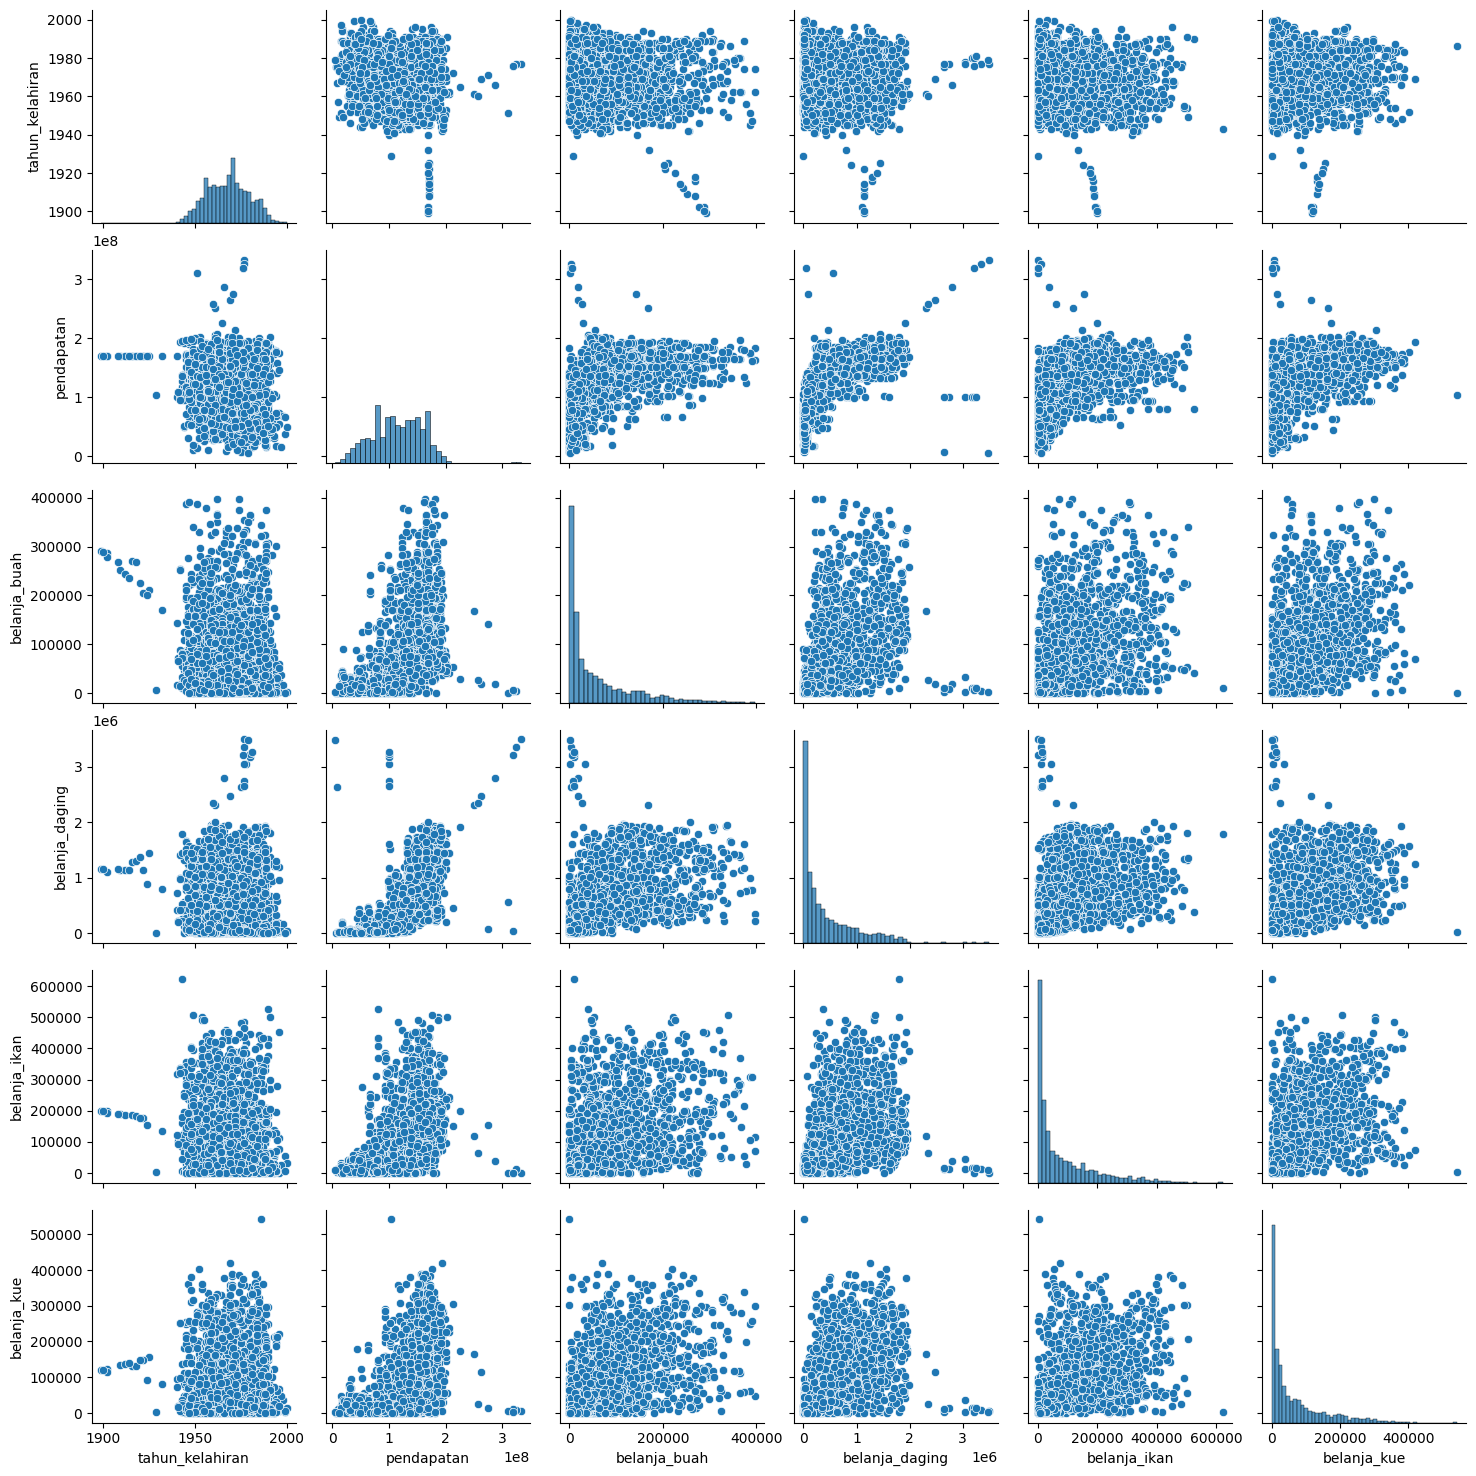

In [8]:
# Data 1
num_cols = [
    'tahun_kelahiran',
    'pendapatan',
    'belanja_buah',
    'belanja_daging',
    'belanja_ikan',
    'belanja_kue'
]

sns.pairplot(train[num_cols])
plt.show()

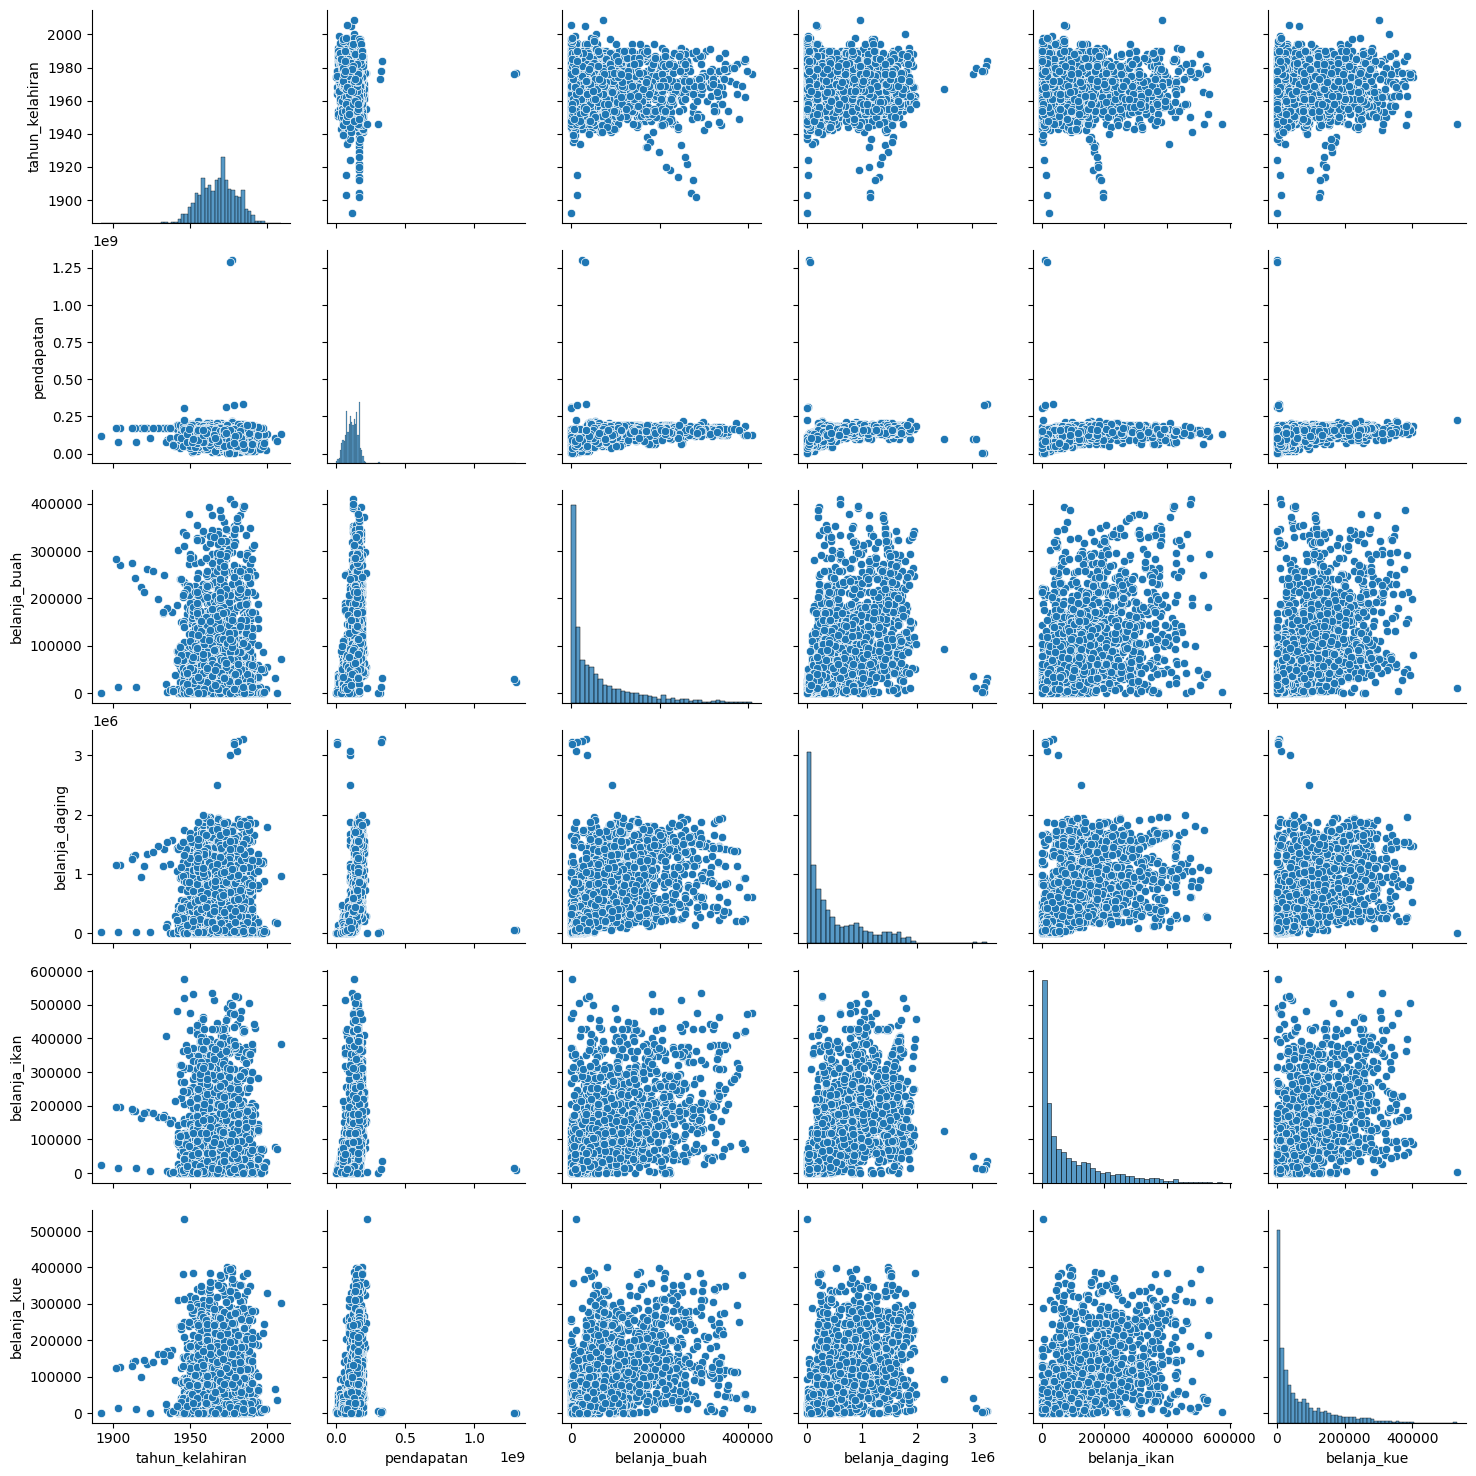

In [9]:
# Data 2
num_cols = [
    'tahun_kelahiran',
    'pendapatan',
    'belanja_buah',
    'belanja_daging',
    'belanja_ikan',
    'belanja_kue'
]

sns.pairplot(test_featurs[num_cols])
plt.show()

Pada kedua data terdapat beberapa kolom yang sedikit linear, contohnya di kolom belanja_buah dan belanja_ikan. Diketahui juga bahwa distribusi data cendering ke kiri(skewness).

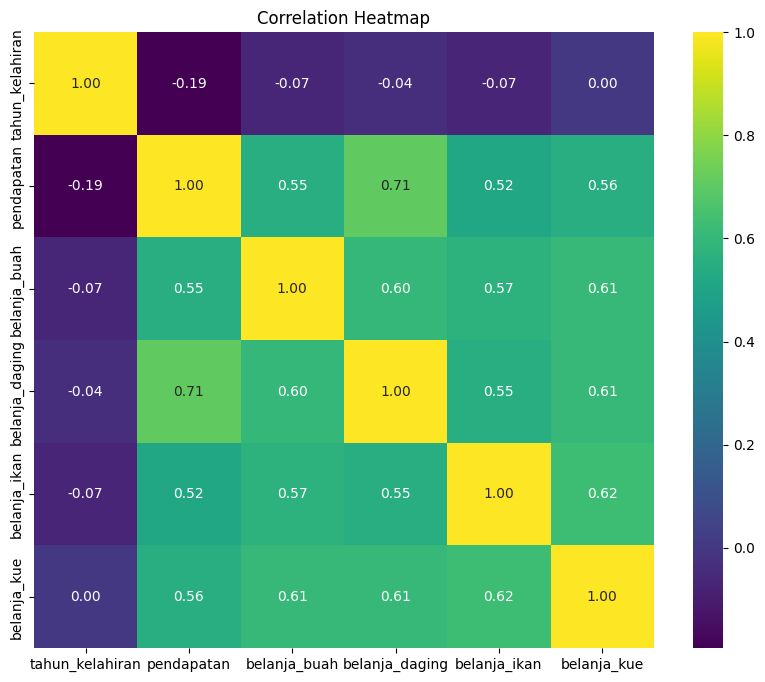

In [10]:
corr = train[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

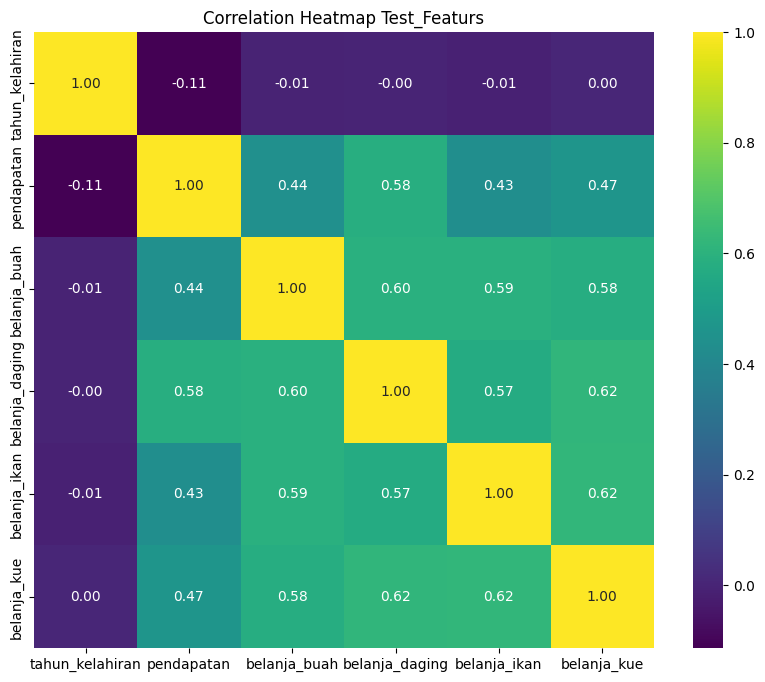

In [11]:
corr = test_featurs[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis',fmt=".2f")
plt.title('Correlation Heatmap Test_Featurs')
plt.show()

Korelasi antar kolom pada data `train` cenderung lebih rendah dibandingkan data `test_featurs`. Namun, korealsi antar kolom belanja_daging dan pendapatan pada data`train` lebih besar dibandingkan data `test_featurs`

#Melihat nilai yang tidak relevan dengan kolom

In [16]:
#Data 1
print("Nilai unik data kategorikal :")
print(f"pendidikan: {train['pendidikan'].unique()}")
print(f"status_pernikahan: {train['status_pernikahan'].unique()}")

Nilai unik data kategorikal :
pendidikan: ['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' nan '5']
status_pernikahan: ['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' nan 'Cerai Mati' '5']


In [18]:
# Data 2
print("Nilai unik data kategorikal :")
print(f"pendidikan: {test_featurs['pendidikan'].unique()}")
print(f"status_pernikahan: {test_featurs['status_pernikahan'].unique()}")

Nilai unik data kategorikal :
pendidikan: ['Sarjana' 'Doktor' 'SMA' 'Magister' nan 'SMP' '5']
status_pernikahan: [nan 'Menikah' 'Rencana Menikah' 'Sendiri' 'Cerai Mati' 'Cerai' '5']


Kedua data sama-sama memiliki nilai yang tidak relevan yaitu nan dan 5.

#Mengubah semua nilai yang tidak relevan dengan nan

In [20]:
# Data 1
train['pendidikan'] = train['pendidikan'].replace('5', np.nan)
train['status_pernikahan'] = train['status_pernikahan'].replace('5', np.nan)

In [19]:
# Data 2
test_featurs['pendidikan'] = test_featurs['pendidikan'].replace('5', np.nan)
test_featurs['status_pernikahan'] = test_featurs['status_pernikahan'].replace('5', np.nan)

#Melakukan Encoding ada kedua data

In [21]:
# Data 1
label_encosding= {
    'SMP' :0,
    'SMA' :1,
    'Sarjana' :2,
    'Magister' :3,
    'Doktor' :4
}

train['pendidikan'] = train['pendidikan'].map(label_encosding)

In [24]:
label_mapping = {
    'Menikah': 1,
    'Rencana Menikah': 2,
    'Sendiri': 3,
    'Cerai Mati': 4,
    'Cerai' : 5
}

train['status_pernikahan'] = train['status_pernikahan'].map(label_mapping)

In [25]:
#Data 2
label_encosding= {
    'SMP' :0,
    'SMA' :1,
    'Sarjana' :2,
    'Magister' :3,
    'Doktor' :4
}

test_featurs['pendidikan'] = test_featurs['pendidikan'].map(label_encosding)

In [26]:
label_mapping = {
    'Menikah': 1,
    'Rencana Menikah': 2,
    'Sendiri': 3,
    'Cerai Mati': 4,
    'Cerai' : 5
}

train['status_pernikahan'] = test_featurs['status_pernikahan'].map(label_mapping)

#Melihat, Membandingkan dengan persentase, dan mengatasi missing values kedua data


In [12]:
#Data 1
train.isnull().sum() /(len(train))*100

,0
tahun_kelahiran,0.000000
pendidikan,4.951533
status_pernikahan,5.554100
pendapatan,4.977731
jumlah_anak_balita,4.977731
jumlah_anak_remaja,5.344511
terakhir_belanja,4.506157
belanja_buah,4.741944
belanja_daging,4.663348
belanja_ikan,5.056327


In [13]:
#Data 2
test_featurs.isnull().sum() /(len(test_featurs))*100

,0
ID,0.000000
tahun_kelahiran,0.000000
pendidikan,5.343112
status_pernikahan,4.766894
pendapatan,5.316920
jumlah_anak_balita,5.474070
jumlah_anak_remaja,5.500262
terakhir_belanja,5.264536
belanja_buah,4.871661
belanja_daging,5.107386


Kedua data memiliki persentase missing values di range yang sama yaitu 4-5. Dengan kolom yang memiliki ketidakwajaran adalah kolom tanggal_menjadi_anggota. Karena informasi yang dapat diambil sedikit, maka kolom tersebut didrop.

In [14]:
train.drop(columns='tanggal_menjadi_anggota', inplace=True)

In [15]:
test_featurs.drop(columns='tanggal_menjadi_anggota', inplace=True)

Jumlah missing values pada kedua data memiliki jumlah yang tidak banyak berbeda di masing-masing kolom. Untuk mengatasi missing values, dilakukan imputasi KNN pada kedua data.


In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(
    random_state=69,   # random_state untuk konsistensi hasil
    max_iter=10,       # jumlah iterasi
    tol=1e-3,          # toleransi untuk konvergensi
    min_value=None,    # nilai minimum yang diperbolehkan
    max_value=None     # nilai maksimum yang diperbolehkan
)

IterativelyImputed = iterative_imputer.fit_transform(train)
train = pd.DataFrame(IterativelyImputed, columns=train.columns).round()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(
    random_state=69,   # random_state untuk konsistensi hasil
    max_iter=10,       # jumlah iterasi
    tol=1e-3,          # toleransi untuk konvergensi
    min_value=None,    # nilai minimum yang diperbolehkan
    max_value=None     # nilai maksimum yang diperbolehkan
)

IterativelyImputed = iterative_imputer.fit_transform(train)
train = pd.DataFrame(IterativelyImputed, columns=train.columns).round()